In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("Datasets/MSFT_2023-01-13.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-13 09:30:00-05:00,237.001999,237.250000,236.210007,236.270004,236.270004,680675
1,2023-01-13 09:31:00-05:00,236.324997,236.858505,236.259995,236.570007,236.570007,85981
2,2023-01-13 09:32:00-05:00,236.539993,236.609894,235.300003,235.300003,235.300003,146506
3,2023-01-13 09:33:00-05:00,235.316193,235.419998,234.919998,235.419998,235.419998,129251
4,2023-01-13 09:34:00-05:00,235.440002,235.779999,235.335007,235.750000,235.750000,90855


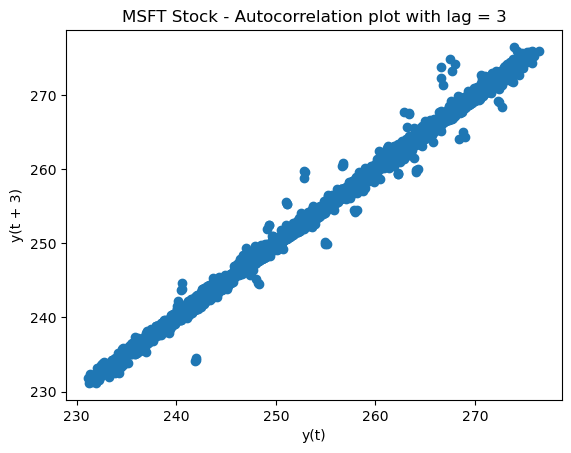

In [3]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title("MSFT Stock - Autocorrelation plot with lag = 3")
plt.show()

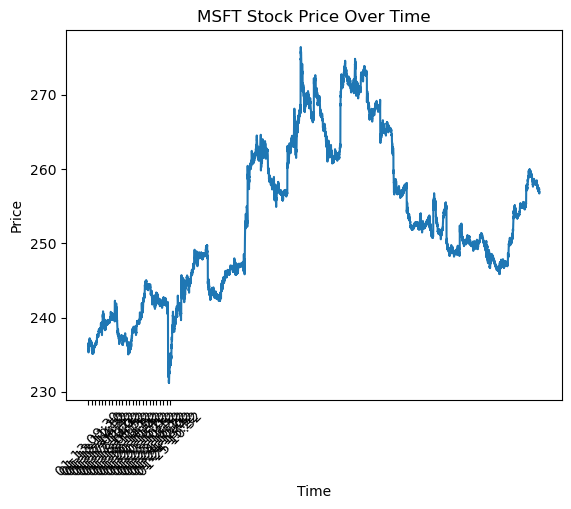

In [4]:
dfloc = df.loc[:, 'Date']
plt.plot(dfloc.str[5:16], df["Close"])
plt.xticks(np.arange(0, 2500, 100), rotation=45)
plt.title("MSFT Stock Price Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [5]:
# Train test split
# 1: Open, 2: High, 3: Low, 4: Close
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    print(time_point, "/", N_test_observations)
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

0 / 3977
1 / 3977
2 / 3977
3 / 3977
4 / 3977
5 / 3977
6 / 3977
7 / 3977
8 / 3977
9 / 3977
10 / 3977
11 / 3977
12 / 3977
13 / 3977
14 / 3977
15 / 3977
16 / 3977
17 / 3977
18 / 3977
19 / 3977
20 / 3977
21 / 3977
22 / 3977
23 / 3977
24 / 3977
25 / 3977
26 / 3977
27 / 3977
28 / 3977
29 / 3977
30 / 3977
31 / 3977
32 / 3977
33 / 3977
34 / 3977
35 / 3977
36 / 3977
37 / 3977
38 / 3977
39 / 3977
40 / 3977
41 / 3977
42 / 3977
43 / 3977
44 / 3977
45 / 3977
46 / 3977
47 / 3977
48 / 3977
49 / 3977
50 / 3977
51 / 3977
52 / 3977
53 / 3977
54 / 3977
55 / 3977
56 / 3977
57 / 3977
58 / 3977
59 / 3977
60 / 3977
61 / 3977
62 / 3977
63 / 3977
64 / 3977
65 / 3977
66 / 3977
67 / 3977
68 / 3977
69 / 3977
70 / 3977
71 / 3977
72 / 3977
73 / 3977
74 / 3977
75 / 3977
76 / 3977
77 / 3977
78 / 3977
79 / 3977
80 / 3977
81 / 3977
82 / 3977
83 / 3977
84 / 3977
85 / 3977
86 / 3977
87 / 3977
88 / 3977
89 / 3977
90 / 3977
91 / 3977
92 / 3977
93 / 3977
94 / 3977
95 / 3977
96 / 3977
97 / 3977
98 / 3977
99 / 3977
100 / 3977

755 / 3977
756 / 3977
757 / 3977
758 / 3977
759 / 3977
760 / 3977
761 / 3977
762 / 3977
763 / 3977
764 / 3977
765 / 3977
766 / 3977
767 / 3977
768 / 3977
769 / 3977
770 / 3977
771 / 3977
772 / 3977
773 / 3977
774 / 3977
775 / 3977
776 / 3977
777 / 3977
778 / 3977
779 / 3977
780 / 3977
781 / 3977
782 / 3977
783 / 3977
784 / 3977
785 / 3977
786 / 3977
787 / 3977
788 / 3977
789 / 3977
790 / 3977
791 / 3977
792 / 3977
793 / 3977
794 / 3977
795 / 3977
796 / 3977
797 / 3977
798 / 3977
799 / 3977
800 / 3977
801 / 3977
802 / 3977
803 / 3977
804 / 3977
805 / 3977
806 / 3977
807 / 3977
808 / 3977
809 / 3977
810 / 3977
811 / 3977
812 / 3977
813 / 3977
814 / 3977
815 / 3977
816 / 3977
817 / 3977
818 / 3977
819 / 3977
820 / 3977
821 / 3977
822 / 3977
823 / 3977
824 / 3977
825 / 3977
826 / 3977
827 / 3977
828 / 3977
829 / 3977
830 / 3977
831 / 3977
832 / 3977
833 / 3977
834 / 3977
835 / 3977
836 / 3977
837 / 3977
838 / 3977
839 / 3977
840 / 3977
841 / 3977
842 / 3977
843 / 3977
844 / 3977
845 / 3977

1459 / 3977
1460 / 3977
1461 / 3977
1462 / 3977
1463 / 3977
1464 / 3977
1465 / 3977
1466 / 3977
1467 / 3977
1468 / 3977
1469 / 3977
1470 / 3977
1471 / 3977
1472 / 3977
1473 / 3977
1474 / 3977
1475 / 3977
1476 / 3977
1477 / 3977
1478 / 3977
1479 / 3977
1480 / 3977
1481 / 3977
1482 / 3977
1483 / 3977
1484 / 3977
1485 / 3977
1486 / 3977
1487 / 3977
1488 / 3977
1489 / 3977
1490 / 3977
1491 / 3977
1492 / 3977
1493 / 3977
1494 / 3977
1495 / 3977
1496 / 3977
1497 / 3977
1498 / 3977
1499 / 3977
1500 / 3977
1501 / 3977
1502 / 3977
1503 / 3977
1504 / 3977
1505 / 3977
1506 / 3977
1507 / 3977
1508 / 3977
1509 / 3977
1510 / 3977
1511 / 3977
1512 / 3977
1513 / 3977
1514 / 3977
1515 / 3977
1516 / 3977
1517 / 3977
1518 / 3977
1519 / 3977
1520 / 3977
1521 / 3977
1522 / 3977
1523 / 3977
1524 / 3977
1525 / 3977
1526 / 3977
1527 / 3977
1528 / 3977
1529 / 3977
1530 / 3977
1531 / 3977
1532 / 3977
1533 / 3977
1534 / 3977
1535 / 3977
1536 / 3977
1537 / 3977
1538 / 3977
1539 / 3977
1540 / 3977
1541 / 3977
1542

2142 / 3977
2143 / 3977
2144 / 3977
2145 / 3977
2146 / 3977
2147 / 3977
2148 / 3977
2149 / 3977
2150 / 3977
2151 / 3977
2152 / 3977
2153 / 3977
2154 / 3977
2155 / 3977
2156 / 3977
2157 / 3977
2158 / 3977
2159 / 3977
2160 / 3977
2161 / 3977
2162 / 3977
2163 / 3977
2164 / 3977
2165 / 3977
2166 / 3977
2167 / 3977
2168 / 3977
2169 / 3977
2170 / 3977
2171 / 3977
2172 / 3977
2173 / 3977
2174 / 3977
2175 / 3977
2176 / 3977
2177 / 3977
2178 / 3977
2179 / 3977
2180 / 3977
2181 / 3977
2182 / 3977
2183 / 3977
2184 / 3977
2185 / 3977
2186 / 3977
2187 / 3977
2188 / 3977
2189 / 3977
2190 / 3977
2191 / 3977
2192 / 3977
2193 / 3977
2194 / 3977
2195 / 3977
2196 / 3977
2197 / 3977
2198 / 3977
2199 / 3977
2200 / 3977
2201 / 3977
2202 / 3977
2203 / 3977
2204 / 3977
2205 / 3977
2206 / 3977
2207 / 3977
2208 / 3977
2209 / 3977
2210 / 3977
2211 / 3977
2212 / 3977
2213 / 3977
2214 / 3977
2215 / 3977
2216 / 3977
2217 / 3977
2218 / 3977
2219 / 3977
2220 / 3977
2221 / 3977
2222 / 3977
2223 / 3977
2224 / 3977
2225

2825 / 3977
2826 / 3977
2827 / 3977
2828 / 3977
2829 / 3977
2830 / 3977
2831 / 3977
2832 / 3977
2833 / 3977
2834 / 3977
2835 / 3977
2836 / 3977
2837 / 3977
2838 / 3977
2839 / 3977
2840 / 3977
2841 / 3977
2842 / 3977
2843 / 3977
2844 / 3977
2845 / 3977
2846 / 3977
2847 / 3977
2848 / 3977
2849 / 3977
2850 / 3977
2851 / 3977
2852 / 3977
2853 / 3977
2854 / 3977
2855 / 3977
2856 / 3977
2857 / 3977
2858 / 3977
2859 / 3977
2860 / 3977
2861 / 3977
2862 / 3977
2863 / 3977
2864 / 3977
2865 / 3977
2866 / 3977
2867 / 3977
2868 / 3977
2869 / 3977
2870 / 3977
2871 / 3977
2872 / 3977
2873 / 3977
2874 / 3977
2875 / 3977
2876 / 3977
2877 / 3977
2878 / 3977
2879 / 3977
2880 / 3977
2881 / 3977
2882 / 3977
2883 / 3977
2884 / 3977
2885 / 3977
2886 / 3977
2887 / 3977
2888 / 3977
2889 / 3977
2890 / 3977
2891 / 3977
2892 / 3977
2893 / 3977
2894 / 3977
2895 / 3977
2896 / 3977
2897 / 3977
2898 / 3977
2899 / 3977
2900 / 3977
2901 / 3977
2902 / 3977
2903 / 3977
2904 / 3977
2905 / 3977
2906 / 3977
2907 / 3977
2908

3508 / 3977
3509 / 3977
3510 / 3977
3511 / 3977
3512 / 3977
3513 / 3977
3514 / 3977
3515 / 3977
3516 / 3977
3517 / 3977
3518 / 3977
3519 / 3977
3520 / 3977
3521 / 3977
3522 / 3977
3523 / 3977
3524 / 3977
3525 / 3977
3526 / 3977
3527 / 3977
3528 / 3977
3529 / 3977
3530 / 3977
3531 / 3977
3532 / 3977
3533 / 3977
3534 / 3977
3535 / 3977
3536 / 3977
3537 / 3977
3538 / 3977
3539 / 3977
3540 / 3977
3541 / 3977
3542 / 3977
3543 / 3977
3544 / 3977
3545 / 3977
3546 / 3977
3547 / 3977
3548 / 3977
3549 / 3977
3550 / 3977
3551 / 3977
3552 / 3977
3553 / 3977
3554 / 3977
3555 / 3977
3556 / 3977
3557 / 3977
3558 / 3977
3559 / 3977
3560 / 3977
3561 / 3977
3562 / 3977
3563 / 3977
3564 / 3977
3565 / 3977
3566 / 3977
3567 / 3977
3568 / 3977
3569 / 3977
3570 / 3977
3571 / 3977
3572 / 3977
3573 / 3977
3574 / 3977
3575 / 3977
3576 / 3977
3577 / 3977
3578 / 3977
3579 / 3977
3580 / 3977
3581 / 3977
3582 / 3977
3583 / 3977
3584 / 3977
3585 / 3977
3586 / 3977
3587 / 3977
3588 / 3977
3589 / 3977
3590 / 3977
3591

In [23]:
model = ARIMA(history, order=(4,1,0))
model_fit = model.fit()
output = model_fit.forecast()
yhat = output[0]
yhat

256.9015576490916

In [15]:
# Save the model
model_fit.save('Models/ARIMA-3-08-2023')

In [21]:
# Load the model
from statsmodels.tsa.arima.model import ARIMAResults
loaded = ARIMAResults.load('Models/ARIMA-3-08-2023')

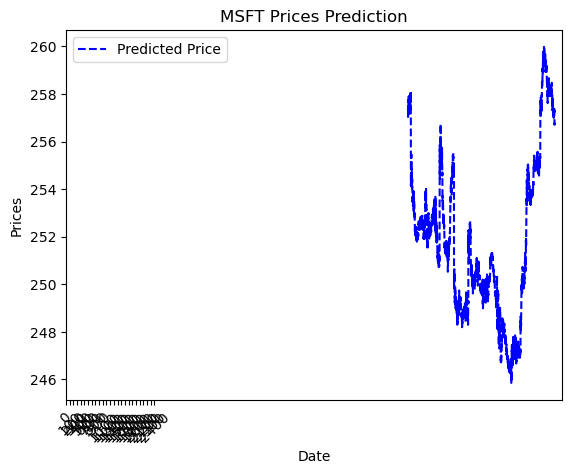

In [7]:
test_set_range = df[int(len(df)*0.7):].index

plt.plot(test_set_range, model_predictions, color = 'blue', linestyle='dashed', label='Predicted Price')

plt.title('MSFT Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0, 2500, 100), rotation=45)

plt.legend()
plt.show()

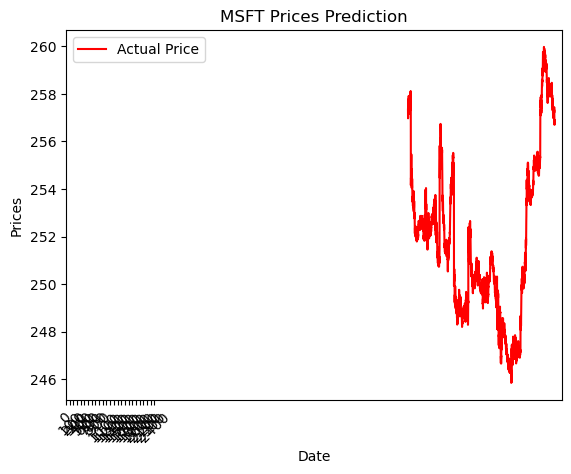

In [8]:
plt.plot(test_set_range, test_data, color = 'red', label='Actual Price')
plt.title('MSFT Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0, 2500, 100), rotation=45)

plt.legend()
plt.show()

In [10]:
predicted_prices_df = pd.DataFrame(model_predictions, columns = ['Close'])
predicted_prices_df.to_csv (r'Predictions\ARIMA Model Price Prediction.csv', index = False, header=True)